In [2]:
!pip install sklearn

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest

# Data import
Using yahoofinancials python library to , let's import the latest data from yahoo finance. For top 5 mutual funds of US Debt securities.
For our research we would be using Long government portifolios, source from [here](https://money.usnews.com/funds/mutual-funds/rankings/long-government).

In [3]:
df = pd.read_csv("./Morningstar - European Mutual Funds.csv")
df.dropna(subset=['rating','risk_rating', 'roic', 'fund_trailing_return_ytd'], inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23034 entries, 0 to 57602
Columns: 132 entries, ticker to quarters_down
dtypes: float64(108), int64(2), object(22)
memory usage: 23.4+ MB


# Exploratory analysis

<AxesSubplot:title={'center':'Risk rating'}>

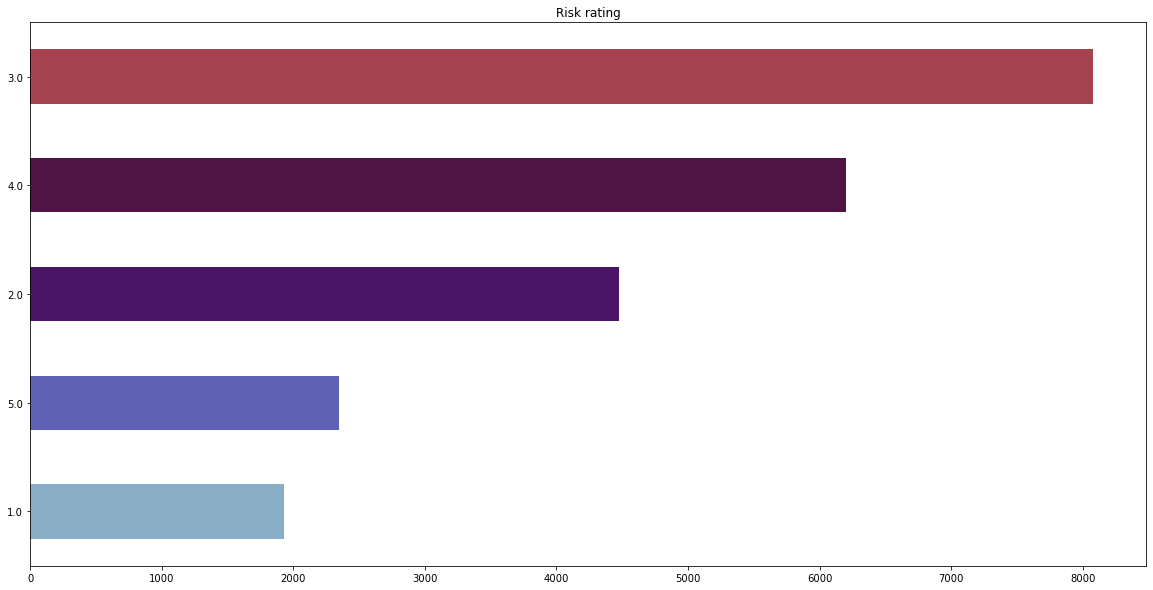

In [4]:
df.risk_rating.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Risk rating", figsize=(20,10), color = sns.color_palette("twilight"))

<AxesSubplot:title={'center':'Top 10 mutual fund categories'}>

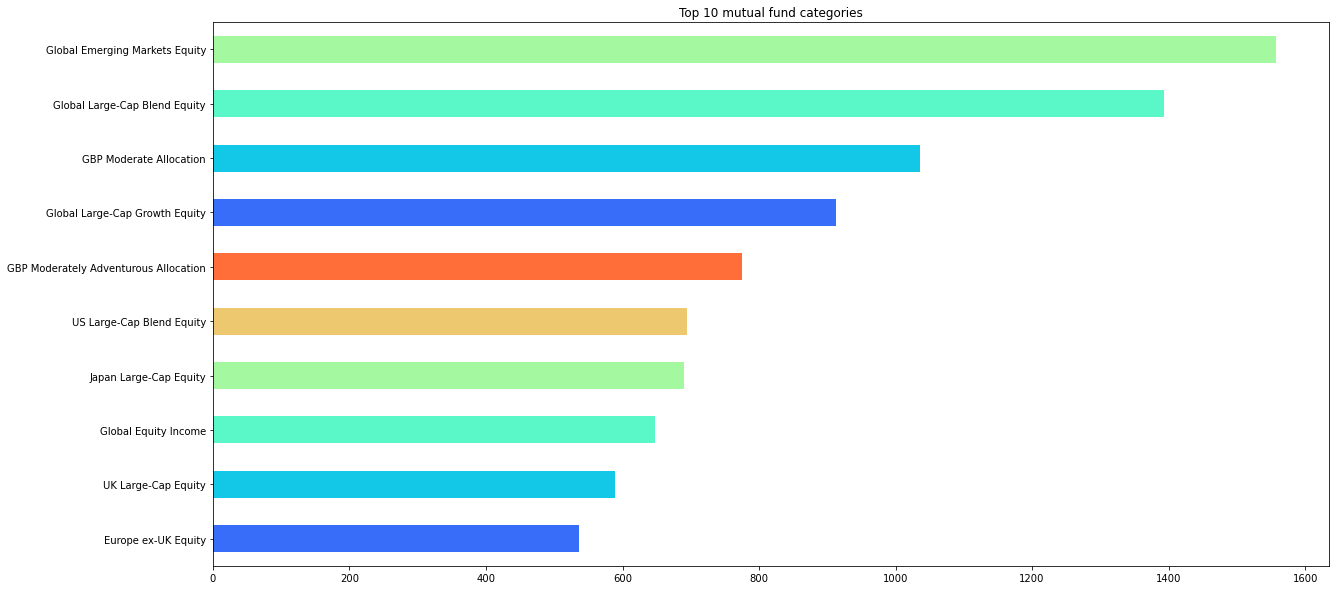

In [4]:
df['category'].value_counts()[:10].sort_values().plot(kind="barh", title = "Top 10 mutual fund categories", figsize=(20,10), color = sns.color_palette("rainbow"))

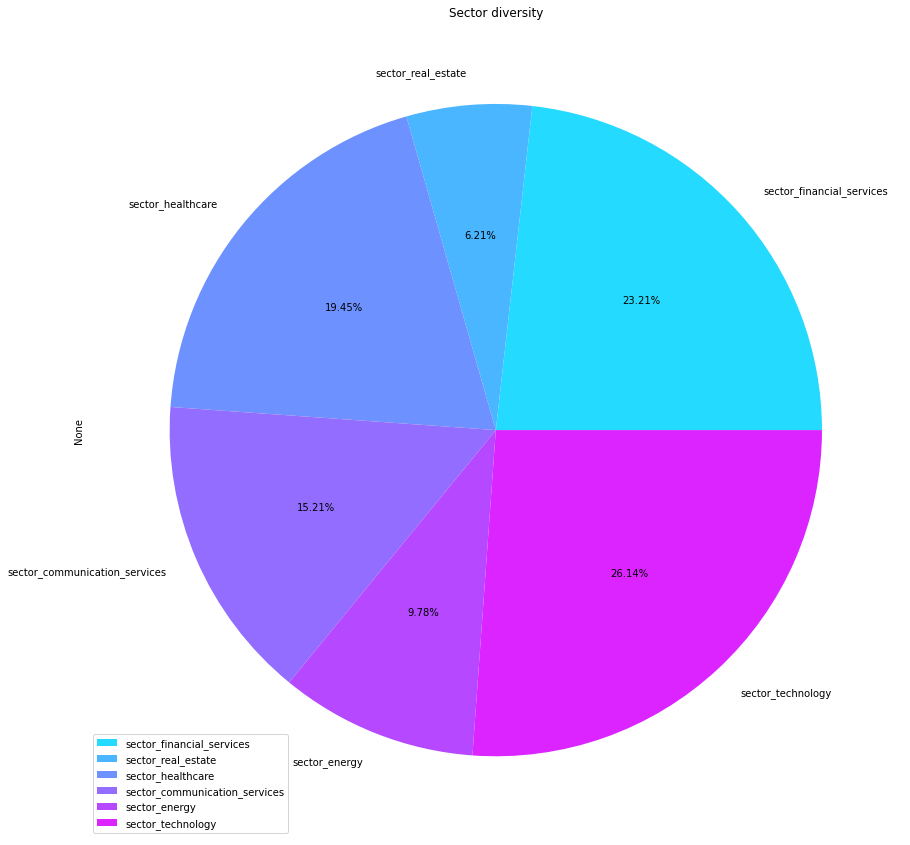

In [6]:

labels = ['sector_financial_services','sector_real_estate','sector_healthcare',
               'sector_communication_services','sector_energy','sector_technology']
means = df[['sector_financial_services','sector_real_estate','sector_healthcare',
               'sector_communication_services','sector_energy','sector_technology']].mean()
y = means.plot(kind='pie', figsize=(15,15), colors=sns.color_palette("cool"), legend=True, autopct='%1.2f%%', shadow=False, startangle=0, title="Sector diversity")

<AxesSubplot:title={'center':'Top 10 fund currencies'}>

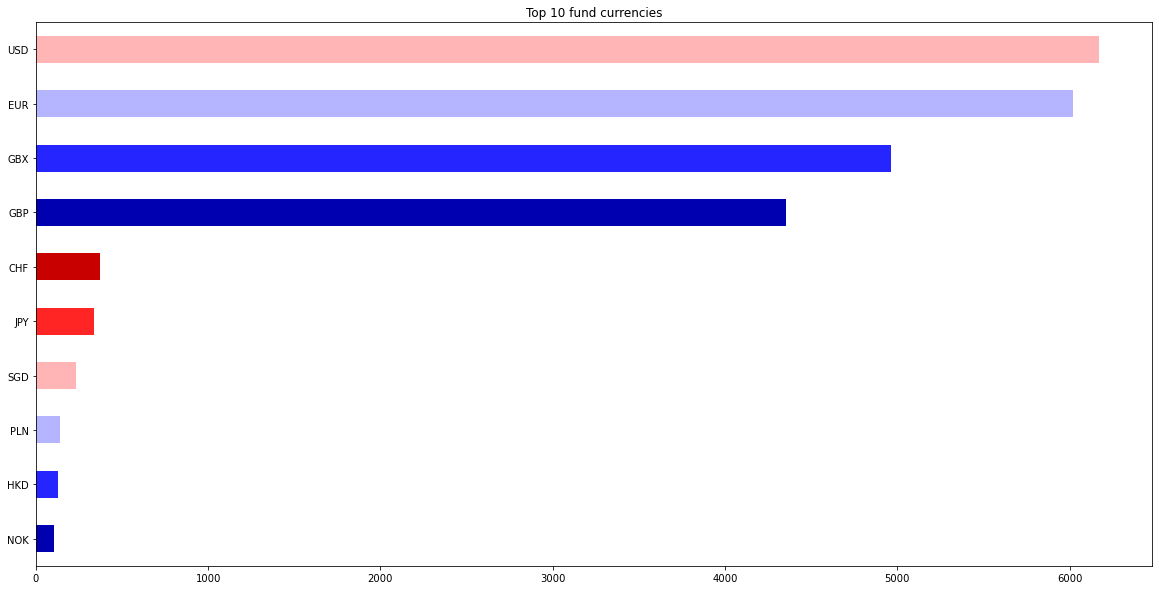

In [7]:
df.nav_per_share_currency.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Top 10 fund currencies", figsize=(20,10), color = sns.color_palette("seismic"))

[Text(0.5, 0, 'Technology'), Text(0, 0.5, '10years Trailing Return')]

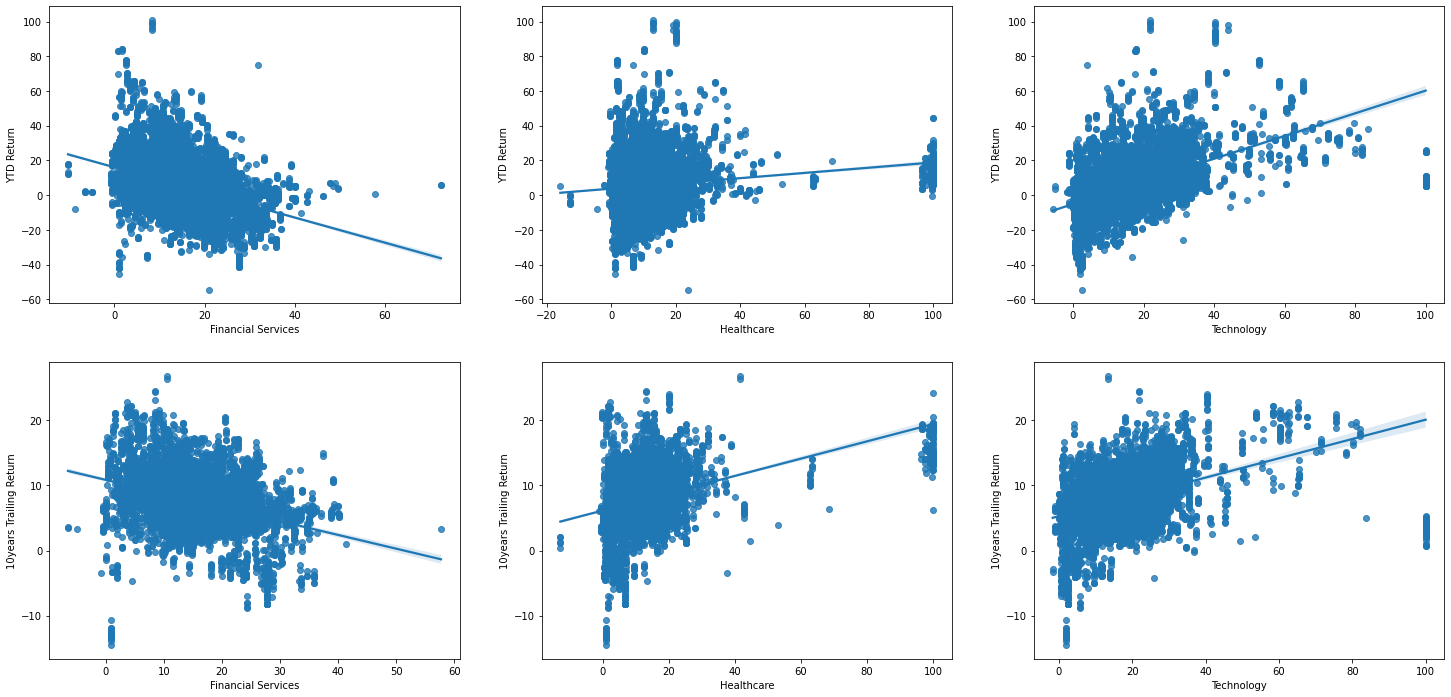

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 12))
sns.regplot(data=df, x='sector_financial_services', y='fund_trailing_return_ytd', truncate=True, ax=ax[0,0])
sns.regplot(data=df, x='sector_healthcare', y='fund_trailing_return_ytd', truncate=True, ax=ax[0,1])
sns.regplot(data=df, x='sector_technology', y='fund_trailing_return_ytd', truncate=True, ax=ax[0,2])
sns.regplot(data=df, x='sector_financial_services', y='fund_trailing_return_10years', truncate=True, ax=ax[1,0])
sns.regplot(data=df, x='sector_healthcare', y='fund_trailing_return_10years', truncate=True, ax=ax[1,1])
sns.regplot(data=df, x='sector_technology', y='fund_trailing_return_10years', truncate=True, ax=ax[1,2])
ax[0, 0].set(xlabel='Financial Services', ylabel='YTD Return')
ax[0, 1].set(xlabel='Healthcare', ylabel='YTD Return')
ax[0, 2].set(xlabel='Technology', ylabel='YTD Return')
ax[1,0].set(xlabel='Financial Services', ylabel='10years Trailing Return')
ax[1,1].set(xlabel='Healthcare', ylabel='10years Trailing Return')
ax[1,2].set(xlabel='Technology', ylabel='10years Trailing Return')

c:\Users\saiki\anaconda3\envs\mutual_fund_analysis\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, '10years Trailing Return')

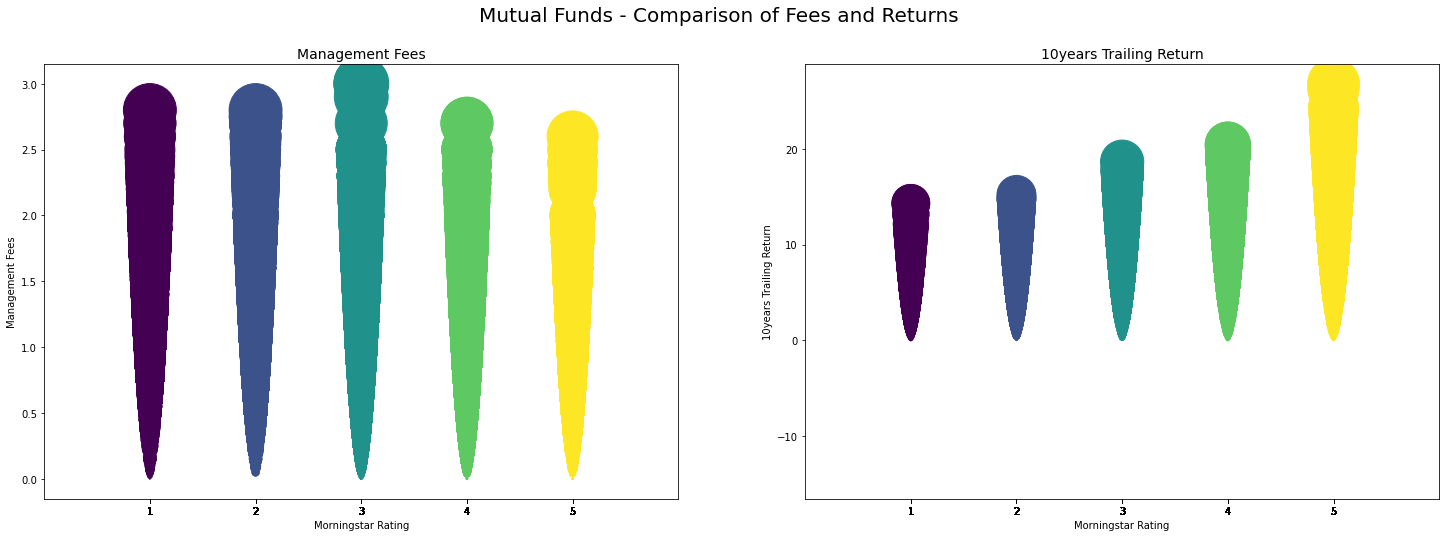

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))
fig.suptitle('Mutual Funds - Comparison of Fees and Returns', fontsize=20)
ax[0].scatter(df['rating'], df['management_fees'], s=1e3*df['management_fees'], c=df['rating'])
ax[0].set_xticks(df['rating'])
ax[0].margins(x=0.25)
ax[0].set_xlabel('Morningstar Rating')
ax[0].set_ylabel('Management Fees')
ax[0].set_title("Management Fees", fontsize=14)
ax[1].scatter(df['rating'], df['fund_trailing_return_10years'], s=1e2*df['fund_trailing_return_10years'], c=df['rating'])
ax[1].set_xticks(df['rating'])
ax[1].margins(x=0.25)
ax[1].set_xlabel('Morningstar Rating')
ax[1].set_ylabel('10years Trailing Return')
ax[1].set_title("10years Trailing Return", fontsize=14)

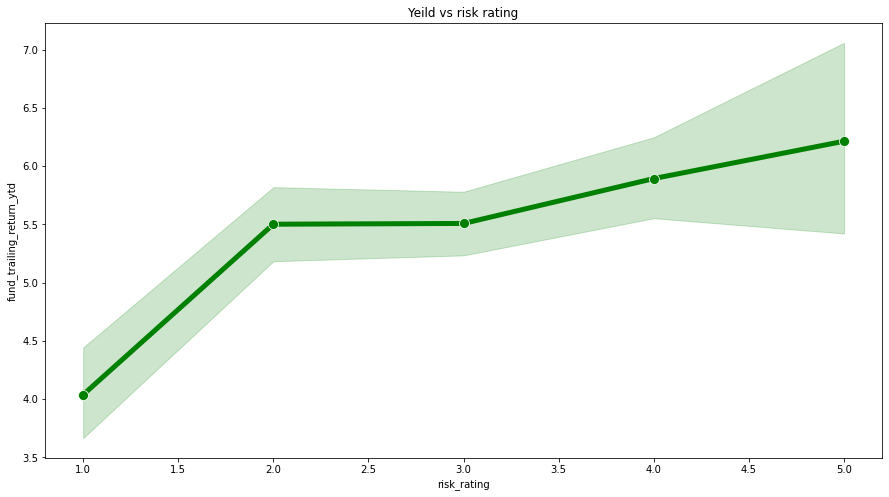

In [27]:
p=sns.lineplot(x='risk_rating', y='fund_trailing_return_ytd', data=df, marker='o', markersize=10, color='green', linewidth=5)
plt.title('Yeild vs risk rating')
plt.gcf().set_size_inches(15, 8)

In [64]:

from scipy import stats
from statsmodels.stats import weightstats as stests

df_sample_1 = df.sample(frac=0.20, random_state=29)
df_sample_2 = df.sample(frac=0.20, random_state=16)
df_sample_3 = df.sample(frac=0.20, random_state=3)

test_avg = 0.2

print("H0 : Null Hypothesis: Mutual funds are risky and does not give much returns.")
print("Ha : Alternate Hypothesis : Mutual funds are safe and give good returns.")

print("Sample 1")
ztest , pval = stests.ztest(df_sample_1['fund_trailing_return_ytd'], value=test_avg, alternative='larger')
print(f"z-test: {ztest}, p-value: {pval}")
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

print("Sample 2")
ztest , pval = stests.ztest(df_sample_2['fund_trailing_return_ytd'], value=test_avg, alternative='larger')
print(f"z-test: {ztest}, p-value: {pval}")
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

print("Sample 2")
ztest , pval = stests.ztest(df_sample_3['fund_trailing_return_ytd'], value=test_avg, alternative='larger')
print(f"z-test: {ztest}, p-value: {pval}")
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

    

H0 : Null Hypothesis: Mutual funds are risky and does not give much returns.
Ha : Alternate Hypothesis : Mutual funds are safe and give good returns.
Sample 1
z-test: 26.452833089968486, p-value: 1.6924704636798308e-154
reject null hypothesis
Sample 2
z-test: 27.469349374937803, p-value: 2.0405464578927426e-166
reject null hypothesis
Sample 2
z-test: 26.850330754754864, p-value: 4.1799529620670183e-159
reject null hypothesis


In [65]:
F, p = stats.f_oneway(df_sample_1['fund_trailing_return_ytd'], df_sample_2['fund_trailing_return_ytd'], df_sample_3['fund_trailing_return_ytd'])
print(p)
if p<0.05:
    print("reject null hypothesis - The samples are not similar")
else:
    print("accept null hypothesis - The samples are similar")

0.8047305068356624
accept null hypothesis - The samples are similar
